<a href="https://colab.research.google.com/github/chouat2207/Python/blob/main/2_2_ML_challenge_Ma%C3%AEtriser_KNN_pour_la_recherche_de_similarit%C3%A9s_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


# 1. Chargement et exploration des données

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/pokemon.csv')


In [ ]:
print(df.info())   #vérifier la sturcutre
print(df.describe())   #statistique descriptives

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None
              #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.

In [ ]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


les colonnes pertinentes pour la comparaison de Pokémon sont : Attack, defense, speed, HP, Sp. atk, SP. def.

# 2. Préparation des Données


In [ ]:
legendary_pokemon = df[df['Legendary']== True]
nonn_legendary_pokemon = df[df['Legendary']==False]

In [ ]:
legendary_pokemon =legendary_pokemon.dropna()


In [ ]:
nonn_legendary_pokemon=nonn_legendary_pokemon.dropna()

In [ ]:
features = df[["HP","Attack","Defense", "Sp. Atk", "Sp. Def", "Speed"]]

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   HP       800 non-null    int64
 1   Attack   800 non-null    int64
 2   Defense  800 non-null    int64
 3   Sp. Atk  800 non-null    int64
 4   Sp. Def  800 non-null    int64
 5   Speed    800 non-null    int64
dtypes: int64(6)
memory usage: 37.6 KB


In [ ]:
scaler= StandardScaler()

In [ ]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
legendary_features = legendary_pokemon[features]

# Vérifier les types
print(legendary_features.dtypes)

HP         int64
Attack     int64
Defense    int64
Sp. Atk    int64
Sp. Def    int64
Speed      int64
dtype: object


In [ ]:
legendary_scaled = scaler.fit_transform(legendary_features)
print(legendary_scaled)

[[-0.31248863 -1.2346242   0.01983202 -1.18085119  0.8698007  -0.81430457]
 [-0.31248863 -1.05925145 -0.68012171 -0.04085004 -0.71784073  0.19100971]
 [-0.31248863 -0.70850594 -0.4468038  -0.04085004 -0.94464665 -0.47919981]
 [ 0.46569317  2.44820368  0.01983202  1.06115107 -0.26422889  2.20163829]
 [ 0.46569317 -1.05925145  1.4197395  -1.37085139  2.18527502  0.86121924]
 [ 0.46569317  0.3437306  -0.4468038  -0.61085062  2.18527502 -0.47919981]
 [-0.79885224 -1.40999696 -0.4468038  -0.61085062  1.09660662  0.86121924]
 [-0.79885224 -0.70850594  0.95310367  0.52915054  2.00383029  0.86121924]
 [-0.79885224 -1.05925145 -0.91343963  0.14915015  0.18938294  0.86121924]
 [-0.79885224  0.3437306   0.01983202  1.2891513   0.64299478  0.86121924]
 [ 0.17387499  2.09745817  2.81964697  0.90915092 -0.71784073 -0.47919981]
 [ 0.4170568   1.04522163 -0.4468038   0.90915092 -0.71784073 -0.14409505]
 [ 0.4170568   2.09745817  0.01983202  2.04915207 -0.26422889  1.196324  ]
 [ 0.17387499 -0.70850594

In [ ]:
non_legendary_scaled = scaler.transform(nonn_legendary_pokemon[features])
print(non_legendary_scaled)

[[-2.50112491 -2.49730805 -2.36001068 -2.32085235 -1.85187032 -3.49514267]
 [-1.77157948 -2.04133888 -1.70672053 -1.75085177 -1.17145257 -2.48982838]
 [-0.79885224 -1.33984786 -0.77344888 -0.990851   -0.26422889 -1.14940933]
 ...
 [-0.55567043 -0.70850594  1.04643084 -2.58685262 -1.39825849 -2.8919541 ]
 [-2.74430672 -3.16372452 -3.01330084 -3.08085312 -2.98589992 -2.82493315]
 [-0.55567043 -1.76074247 -0.91343963 -1.10485112 -1.17145257  1.73249162]]


# 3. Implémentation de NearestNeighbors

In [ ]:
NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [ ]:
#n_neighbors par defaut est 5
nn_model= NearestNeighbors(metric='euclidean')
nn_model.fit(non_legendary_scaled)

NearestNeighbors(metric='euclidean')

# 4. Recherche de Similarités

In [ ]:
for index, legendry in enumerate(legendary_scaled):
    distances, indices = nn_model.kneighbors([legendry])    # ou bien nn_model.kneighbors(legendry.reshape(1,-1))
    print(f"Pour le Pokémon légendaire à l'index : {index}")
    for neighbor_indices in indices:
        recommended_names = nonn_legendary_pokemon.iloc[neighbor_indices]['Name'].values
        print("Pokémon non légendaires recommandés: ", recommended_names)


Pour le Pokémon légendaire à l'index : 0
Pokémon non légendaires recommandés:  ['Venusaur' 'Kingdra' 'Mega Altaria' 'Togekiss' 'Celebi']
Pour le Pokémon légendaire à l'index : 1
Pokémon non légendaires recommandés:  ['Hydreigon' 'Keldeo Resolute Forme' 'Keldeo Ordinary Forme' 'Charizard'
 'Delphox']
Pour le Pokémon légendaire à l'index : 2
Pokémon non légendaires recommandés:  ['Hydreigon' 'Charizard' 'Genesect' 'Kingdra' 'Celebi']
Pour le Pokémon légendaire à l'index : 3
Pokémon non légendaires recommandés:  ['Mega Salamence' 'Mega Garchomp' 'Mega Blaziken' 'Mega Lucario'
 'Mega Charizard X']
Pour le Pokémon légendaire à l'index : 4
Pokémon non légendaires recommandés:  ['Celebi' 'Mega Venusaur' 'Mega Metagross' 'Meloetta Aria Forme'
 'Mega Gyarados']
Pour le Pokémon légendaire à l'index : 5
Pokémon non légendaires recommandés:  ['Mega Gyarados' 'Meloetta Aria Forme' 'Dragonite' 'Mega Swampert'
 'Celebi']
Pour le Pokémon légendaire à l'index : 6
Pokémon non légendaires recommandés:  [

In [ ]:
for idx, row in legendary_pokemon.iterrows():
    print(f"Pokémon légendaire : {row['Name']}")
    print("Recommandations : ", nonn_legendary_pokemon.iloc[neighbor_indices]['Name'].values)

Pokémon légendaire : Articuno
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Zapdos
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Moltres
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Mega Mewtwo X
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Lugia
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Ho-oh
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Latias
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Mega Latias
Recommandations :  ['Mega Altaria' 'Mega Venusaur' 'Magnezone' 'Metagross' 'Empoleon']
Pokémon légendaire : Latios
Recommandations :  ['Mega Altaria' 'Meg

# 5. Présentation des résultats

In [ ]:
for index, legendry in enumerate(legendary_scaled):
    distances, indices = nn_model.kneighbors([legendry])
    legendary_name = legendary_pokemon.iloc[index]['Name']
    print(f"Pour le Pokémon légendaire : {legendary_name}")
    print("Recommandations de Pokémon non-légendaires (triés par similarité) :")

    # Parcourir les voisins proches
    for i, neighbor_idx in enumerate(indices[0]):
        recommended_name = nonn_legendary_pokemon.iloc[neighbor_idx]['Name']
        recommended_stats = nonn_legendary_pokemon.iloc[neighbor_idx][features].to_dict()  # Caractéristiques
        distance = distances[0][i]
        print(f"  {i+1}. {recommended_name} - Distance : {distance:.2f}")
        print(f"     Caractéristiques : {recommended_stats}")

    print("\n")


Pour le Pokémon légendaire : Articuno
Recommandations de Pokémon non-légendaires (triés par similarité) :
  1. Venusaur - Distance : 1.52
     Caractéristiques : {'HP': 80, 'Attack': 82, 'Defense': 83, 'Sp. Atk': 100, 'Sp. Def': 100, 'Speed': 80}
  2. Kingdra - Distance : 1.60
     Caractéristiques : {'HP': 75, 'Attack': 95, 'Defense': 95, 'Sp. Atk': 95, 'Sp. Def': 95, 'Speed': 85}
  3. Mega Altaria - Distance : 1.67
     Caractéristiques : {'HP': 75, 'Attack': 110, 'Defense': 110, 'Sp. Atk': 110, 'Sp. Def': 105, 'Speed': 80}
  4. Togekiss - Distance : 1.69
     Caractéristiques : {'HP': 85, 'Attack': 50, 'Defense': 95, 'Sp. Atk': 120, 'Sp. Def': 115, 'Speed': 80}
  5. Celebi - Distance : 1.69
     Caractéristiques : {'HP': 100, 'Attack': 100, 'Defense': 100, 'Sp. Atk': 100, 'Sp. Def': 100, 'Speed': 100}


Pour le Pokémon légendaire : Zapdos
Recommandations de Pokémon non-légendaires (triés par similarité) :
  1. Hydreigon - Distance : 0.60
     Caractéristiques : {'HP': 92, 'Attack': 

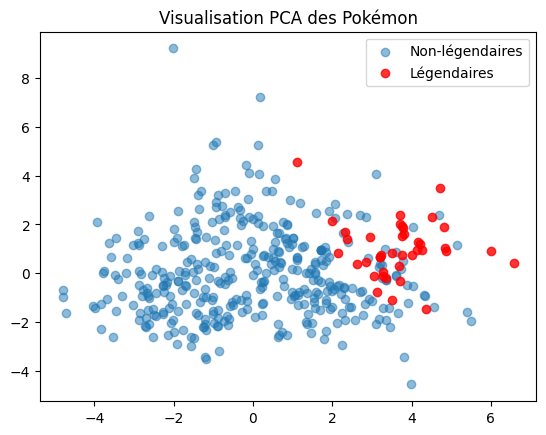

In [ ]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimensionnalité
pca = PCA(n_components=2)
non_legendary_pca = pca.fit_transform(non_legendary_scaled)
legendary_pca = pca.transform(legendary_scaled)

# Visualisation
plt.scatter(non_legendary_pca[:, 0], non_legendary_pca[:, 1], label='Non-légendaires', alpha=0.5)
plt.scatter(legendary_pca[:, 0], legendary_pca[:, 1], label='Légendaires', color='red', alpha=0.8)
plt.legend()
plt.title("Visualisation PCA des Pokémon")
plt.show()


# 6. Analyse et interprétation



Un faible k donne des recommandations spécifiques, tandis qu'un k plus élevé permet d'obtenir une plus grande diversité.

Par défaut, k = 5, mais cela peut être ajusté selon les besoins.